In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [10]:
def System(r,t,m=1):
    
    na,nb,nc = r
    
    lama = 0.5
    lamb = 0.3
    
    dnadt = -0.5*na
    dnbdt = 0.5*na - 0.3*nb 
    dncdt = 0.3*nb
    
    return np.array([dnadt,dnbdt,dncdt])

r0 = np.array([500,0,0])

t = np.linspace(0,10,50)

sol = odeint(System, r0, t, args=(1.3,))

In [11]:
def Increment(f,r,t,h):
    
    state1 = np.array([r[0],r[1],r[2]])
    K1 = f(state1,t)
    
    state2 = np.array([r[0]+0.5*h*K1[0],r[1]+0.5*h*K1[1],r[2]+0.5*h*K1[2]])
    K2 = f(state2,t+0.5*h)
    
    state3 = np.array([r[0]+0.5*h*K2[0],r[1]+0.5*h*K2[1],r[2]+0.5*h*K2[2]])
    K3 = f(state3,t+0.5*h)
    
    state4 = np.array([r[0]+h*K3[0],r[1]+h*K3[1],r[2]+h*K3[2]])
    K4 = f(state4, t+h)
    
    Deltaf = h*(K1+2*K2+2*K3+K4)/6
    
    return r+Deltaf

def Adaptativo(f,r0,t,e=1e-4):
    
    h  = t[1]-t[0]
    
    tf = t[-1]
    t = t[0]
    
    r = r0
    
    Time = np.array([t])
    Vector = r
    
    while t < tf:
        
        # Avance h desde el punto actual
        r1 = Increment(f,r,t,h)
        # Avance h desde el siguiente punto
        r2 = Increment(f,r1,t+h,h)
        # Avance 2h desde el punto actual
        rt = Increment(f,r,t,2*h)
        # El error es comparar los avances
        #->h->h y ->2h en sus componentes
        error = np.linalg.norm( r2 - rt )

        # Si el error es menor que la tolerancia (e) -> avanzo 2h
        if error < e:
            t += 2*h
            r = rt
            Vector = np.vstack((Vector,r))
            Time = np.append(Time,t)
        # Si el error es muy grande, cambie el paso
        q = 0.85*(e/error)**(1/4)
        h = h*q
        
    return Time, Vector

mit, vector = Adaptativo(System,r0,t)

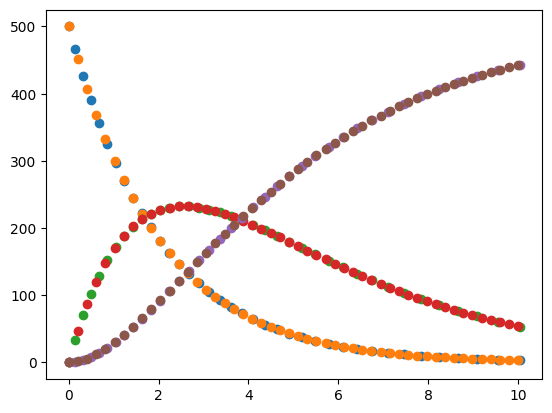

In [18]:
plt.scatter(mit,vector[:,0])
plt.scatter(t,sol[:,0])
plt.scatter(mit,vector[:,1])
plt.scatter(t,sol[:,1])
plt.scatter(mit,vector[:,2])
plt.scatter(t,sol[:,2])

Son practicamente iguales

Maximo de b

In [20]:
maximo = max(vector[:,1])
maximo

232.1920182235683

valores de A  en maximo de B

In [25]:
indi = np.where(vector[:,1] == maximo)[0][0]
vector[indi,0]

146.7295259199198

valores de C  en maximo de B

In [26]:
vector[indi,2]

121.0784558565119